In [1]:
import os

import cv2
import pyvips
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data_dir = os.path.join("..", "data", "images")
image_names = os.listdir(data_dir)

print("num images:", len(image_names))

num images: 127


In [3]:
image_paths = [os.path.join(data_dir, i) for i in image_names]

images = [pyvips.Image.new_from_file(f, access="sequential") for f in image_paths]

In [4]:
test_image = images[image_names.index("10659.ome.tif")]

test_image = test_image.numpy()

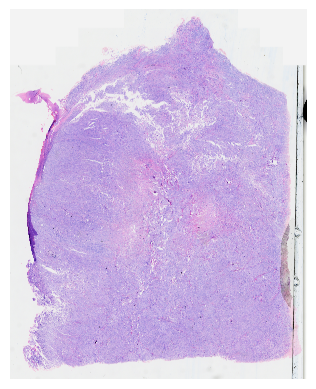

In [5]:
plt.imshow(test_image)
plt.axis("off")
plt.show()

In [6]:
gray = cv2.cvtColor(test_image, cv2.COLOR_BGR2GRAY)
_, binary = cv2.threshold(gray, 230, 255, cv2.THRESH_BINARY_INV)
binary = cv2.GaussianBlur(binary, (31, 31), 0)
contours, _ = cv2.findContours(binary, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

x_min, y_min, x_max, y_max = float("inf"), float("inf"), float("-inf"), float("-inf")

for contour in contours:
    x, y, w, h = cv2.boundingRect(contour)
    if w > 500 and h > 500:
        x_min = min(x_min, x)
        y_min = min(y_min, y)
        x_max = max(x_max, x + w)
        y_max = max(y_max, y + h)

if not (x_min == float("inf") and y_min == float("inf") and x_max == float("-inf") and y_max == float("-inf")):
    image = test_image[y_min:y_max, x_min:x_max]

height, width = image.shape[:2]

image = cv2.resize(image, (width // 100, height // 100))

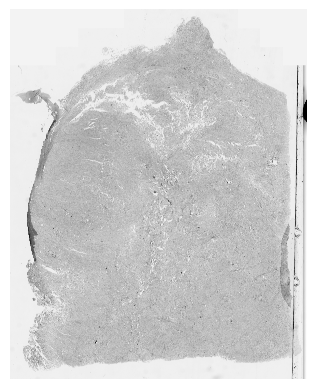

In [7]:
plt.imshow(gray, cmap="gray")
plt.axis("off")
plt.show()

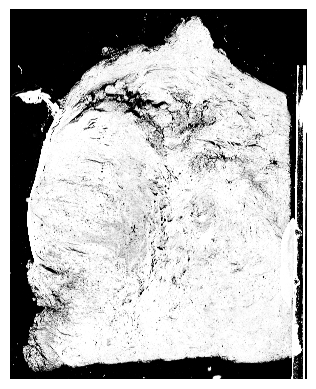

In [8]:
plt.imshow(binary, cmap="gray")
plt.axis("off")
plt.show()

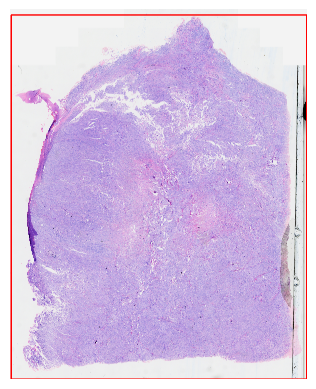

In [9]:
contoured_image = cv2.rectangle(test_image, (x_min, y_min), (x_max, y_max), (255, 0, 0), 200)

plt.imshow(contoured_image)
plt.axis("off")
plt.show()